In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy import sparse
from xgboost import XGBClassifier
from textblob import TextBlob

[nltk_data] Error loading stopwords: <urlopen error [Errno 2] No such
[nltk_data]     file or directory>


In [30]:
!pip install imblearn
from imblearn.under_sampling import NearMiss

In [14]:
pip install wordcloud

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
data=pd.read_csv('E:/0_1_Data Science and AI_Intellipaat/Assignments/000cap stone/Project/Reviews.csv')

In [5]:
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

In [6]:
data.describe()

Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09

In [7]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [8]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [10]:
data.shape

(568411, 10)

In [11]:
data.nunique()

Id                        568411
ProductId                  74258
UserId                    256047
ProfileName               218413
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295736
Text                      393565
dtype: int64

In [12]:
data.duplicated().sum()

0

No duplicate rows in the dataframe

In [6]:
a=data.groupby('ProductId')['Score'].mean()
data['Average rating']=data['ProductId'].map(a)

In [14]:
a['B001EO7N10']

4.5

In [15]:
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  Average rating  
0       I have bought several of the Vitality canned d...            5.00  
1       Product arrived labeled as Jumbo Salted Peanut...            1.00  
2       This is a confection that has been around a fe...            4.00  
3       If you are looking for the secret ingredient i...            2.00  
4       Great taffy at a great price.  There was a wid...            4.75  
...                                                   ...             ...  
568449  Great for sesame chicken..this is a good if no...            4.50  
568450  I'm disappointed with the flavor. The chocolat...            2.00  
568451  These stars are small, so you can give 10-15 o...            5.00  
568452  These are the BEST treats for training and rew...            5.00  
568453  I am very satisfied ,product is as advertised,...            5.00  

[568411 rows x 11 columns]

The above gives the average rating of each product by customers

In [16]:
data.groupby('Average rating')['ProductId'].count()

Average rating
1.000000     4118
1.062500       16
1.142857        7
1.200000       15
1.250000       36
            ...  
4.964286       84
4.968750       64
4.972973       37
4.973451      113
5.000000    52787
Name: ProductId, Length: 1685, dtype: int64

Many of the objects have a 5 star rating

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# vader

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
senti=SentimentIntensityAnalyzer()

In [20]:
def get_sentiment(sentence):
    return senti.polarity_scores(sentence)['compound']
data['Sentiment compound']=data['Text'].apply(get_sentiment)

In [21]:
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  Average rating  \
0       I have bought several of the Vitality canned d...            5.00   
1       Product arrived labeled as Jumbo Salted Peanut...            1.00   
2       This is a confection that has been around a fe...            4.00   
3       If you are looking for the secret ingredient i...            2.00   
4       Great taffy at a great price.  There was a wid...            4.75   
...                                                   ...             ...   
568449  Great for sesame chicken..this is a good if no...            4.50   
568450  I'm disappointed with the flavor. The chocolat...            2.00   
568451  These stars are small, so you can give 10-15 o...            5.00   
568452  These are the BEST treats for training and rew...            5.00   
568453  I am very satisfied ,product is as advertised,...            5.00   

        Sentiment compound  
0                   0.9441  
1                  -0.5664  
2                   0.8265  
3                   0.0000  
4                   0.9468  
...                    ...  
568449              0.8589  
568450             -0.4848  
568451              0.4352  
568452              0.9717  
568453              0.4754  

[568411 rows x 12 columns]

In [22]:
data['Sentiment compound summary']=data['Summary'].apply(get_sentiment)

In [23]:
data.reset_index(inplace=True,drop=True)
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568406  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568407  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568408  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568409  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568410  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568406                     0                       0      5  1299628800   
568407                     0                       0      2  1331251200   
568408                     2                       2      5  1329782400   
568409                     1                       1      5  1331596800   
568410                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568406                 Will not do without   
568407                        disappointed   
568408            Perfect for our maltipoo   
568409  Favorite Training and reward treat   
568410                         Great Honey   

                                                     Text  Average rating  \
0       I have bought several of the Vitality canned d...            5.00   
1       Product arrived labeled as Jumbo Salted Peanut...            1.00   
2       This is a confection that has been around a fe...            4.00   
3       If you are looking for the secret ingredient i...            2.00   
4       Great taffy at a great price.  There was a wid...            4.75   
...                                                   ...             ...   
568406  Great for sesame chicken..this is a good if no...            4.50   
568407  I'm disappointed with the flavor. The chocolat...            2.00   
568408  These stars are small, so you can give 10-15 o...            5.00   
568409  These are the BEST treats for training and rew...            5.00   
568410  I am very satisfied ,product is as advertised,...            5.00   

        Sentiment compound  Sentiment compound summary  
0                   0.9441                      0.4404  
1                  -0.5664                      0.0000  
2                   0.8265                      0.0000  
3                   0.0000                      0.0000  
4                   0.9468                      0.6249  
...                    ...                         ...  
568406              0.8589                      0.0000  
568407             -0.4848                     -0.4767  
568408              0.4352                      0.5719  
568409              0.9717                      0.8555  
568410              0.4754                      0.6249  


In [24]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    if sentiment < neg_threshold:
        label = 'Negative'
    elif sentiment > pos_threshold:
        label = 'Positive'
    else:
        label = 'Neutral'
    return label
data['Sentiment'] = data['Sentiment compound'].apply(categorise_sentiment)

In [25]:
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568406  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568407  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568408  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568409  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568410  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568406                     0                       0      5  1299628800   
568407                     0                       0      2  1331251200   
568408                     2                       2      5  1329782400   
568409                     1                       1      5  1331596800   
568410                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568406                 Will not do without   
568407                        disappointed   
568408            Perfect for our maltipoo   
568409  Favorite Training and reward treat   
568410                         Great Honey   

                                                     Text  Average rating  \
0       I have bought several of the Vitality canned d...            5.00   
1       Product arrived labeled as Jumbo Salted Peanut...            1.00   
2       This is a confection that has been around a fe...            4.00   
3       If you are looking for the secret ingredient i...            2.00   
4       Great taffy at a great price.  There was a wid...            4.75   
...                                                   ...             ...   
568406  Great for sesame chicken..this is a good if no...            4.50   
568407  I'm disappointed with the flavor. The chocolat...            2.00   
568408  These stars are small, so you can give 10-15 o...            5.00   
568409  These are the BEST treats for training and rew...            5.00   
568410  I am very satisfied ,product is as advertised,...            5.00   

        Sentiment compound  Sentiment compound summary Sentiment  
0                   0.9441                      0.4404  Positive  
1                  -0.5664                      0.0000  Negative  
2                   0.8265                      0.0000  Positive  
3                   0.0000                      0.0000   Neutral  
4                   0.9468                      0.6249  Positive  
...                    ...                         ...       ...  
568406              0.8589                      0.0000  Positive  
568407             -0.4848                     -0.4767  Negative  
568408              0.4352                      0.5719  Positive  
568409        

In [26]:
data['Sentiment'].value_counts()

Positive    496938
Negative     59303
Neutral      12170
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

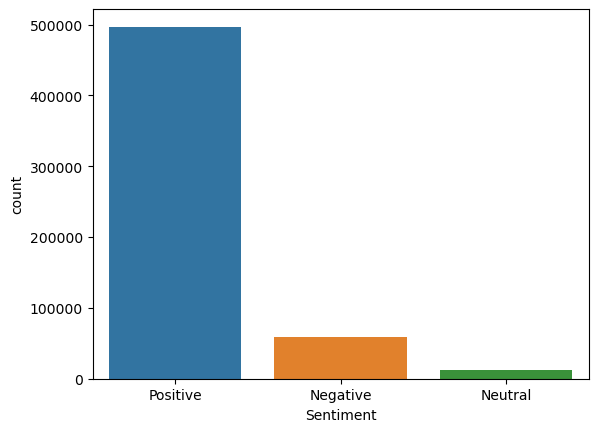

In [27]:
sns.countplot(x='Sentiment',data=data)

In [28]:
data['Sentiment'].value_counts()

Positive    496938
Negative     59303
Neutral      12170
Name: Sentiment, dtype: int64

In [29]:
len(data[data['Sentiment']=='Positive']['ProductId'].unique())

69646

In [30]:
len(data[data['Sentiment']=='Negative']['ProductId'].unique())

22891

In [31]:
len(data[data['Sentiment']=='Neutral']['ProductId'].unique())

8268

    Totally 69646 unique products have been rated positive
    22891 unique products have been rated negative
    8268 unique products have been rated neutrally by users


Text(0.5, 1.0, 'Unique products rated by each customer')

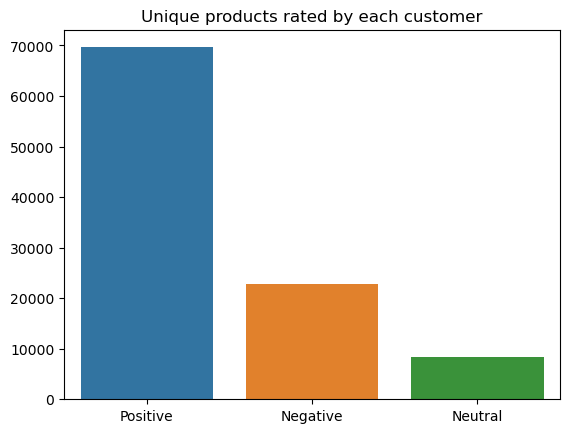

In [32]:
sns.barplot(x=['Positive','Negative','Neutral'],y=[len(data[data['Sentiment']=='Positive']['ProductId'].unique()),
                                                  len(data[data['Sentiment']=='Negative']['ProductId'].unique()),
                                                  len(data[data['Sentiment']=='Neutral']['ProductId'].unique())])
plt.title('Unique products rated by each customer')

<AxesSubplot:xlabel='Score', ylabel='count'>

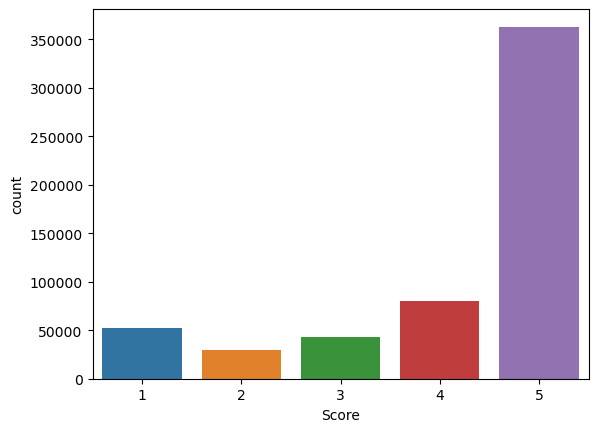

In [33]:
sns.countplot(x='Score',data=data)

Clearly the data is quite biased towards rating 5 which are extremely high.

In [34]:
data[data['Average rating']>=4]['HelpfulnessNumerator']

0         1
2         1
4         0
5         0
6         0
         ..
568405    0
568406    0
568408    2
568409    1
568410    0
Name: HelpfulnessNumerator, Length: 406152, dtype: int64

# Text blob

In [35]:
data[['polarity', 'subjectivity']] = data['Text'].apply(lambda x:TextBlob(x).sentiment).to_list()
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568406  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568407  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568408  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568409  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568410  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568406                     0                       0      5  1299628800   
568407                     0                       0      2  1331251200   
568408                     2                       2      5  1329782400   
568409                     1                       1      5  1331596800   
568410                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568406                 Will not do without   
568407                        disappointed   
568408            Perfect for our maltipoo   
568409  Favorite Training and reward treat   
568410                         Great Honey   

                                                     Text  Average rating  \
0       I have bought several of the Vitality canned d...            5.00   
1       Product arrived labeled as Jumbo Salted Peanut...            1.00   
2       This is a confection that has been around a fe...            4.00   
3       If you are looking for the secret ingredient i...            2.00   
4       Great taffy at a great price.  There was a wid...            4.75   
...                                                   ...             ...   
568406  Great for sesame chicken..this is a good if no...            4.50   
568407  I'm disappointed with the flavor. The chocolat...            2.00   
568408  These stars are small, so you can give 10-15 o...            5.00   
568409  These are the BEST treats for training and rew...            5.00   
568410  I am very satisfied ,product is as advertised,...            5.00   

        Sentiment compound  Sentiment compound summary Sentiment  polarity  \
0                   0.9441                      0.4404  Positive  0.450000   
1                  -0.5664                      0.0000  Negative -0.033333   
2                   0.8265                      0.0000  Positive  0.133571   
3                   0.0000                      0.0000   Neutral  0.166667   
4                   0.9468                      0.6249  Positive  0.483333   
...                    ...                         ...       ...       ...   
568406              0.8589                      0.0000  Positive  0.365000   
568407             -0.4848                     -0.4767  Nega

In [36]:
data['Sentiment_textblob']=data['polarity'].apply(categorise_sentiment)

In [37]:
data['target']=np.zeros((data.shape[0],1))
for i in tqdm(range(0,data.shape[0])):
    data['target'][i]=categorise_sentiment(data['Average rating'][i],neg_threshold=2.5,pos_threshold=3.5)

100%|█████████████████████████████████| 568411/568411 [58:12<00:00, 162.77it/s]


In [38]:
data

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568406  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568407  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568408  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568409  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568410  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568406                     0                       0      5  1299628800   
568407                     0                       0      2  1331251200   
568408                     2                       2      5  1329782400   
568409                     1                       1      5  1331596800   
568410                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568406                 Will not do without   
568407                        disappointed   
568408            Perfect for our maltipoo   
568409  Favorite Training and reward treat   
568410                         Great Honey   

                                                     Text  Average rating  \
0       I have bought several of the Vitality canned d...            5.00   
1       Product arrived labeled as Jumbo Salted Peanut...            1.00   
2       This is a confection that has been around a fe...            4.00   
3       If you are looking for the secret ingredient i...            2.00   
4       Great taffy at a great price.  There was a wid...            4.75   
...                                                   ...             ...   
568406  Great for sesame chicken..this is a good if no...            4.50   
568407  I'm disappointed with the flavor. The chocolat...            2.00   
568408  These stars are small, so you can give 10-15 o...            5.00   
568409  These are the BEST treats for training and rew...            5.00   
568410  I am very satisfied ,product is as advertised,...            5.00   

        Sentiment compound  Sentiment compound summary Sentiment  polarity  \
0                   0.9441                      0.4404  Positive  0.450000   
1                  -0.5664                      0.0000  Negative -0.033333   
2                   0.8265                      0.0000  Positive  0.133571   
3                   0.0000                      0.0000   Neutral  0.166667   
4                   0.9468                      0.6249  Positive  0.483333   
...                    ...                         ...       ...       ...   
568406              0.8589                      0.0000  Positive  0.365000   
568407             -0.4848                     -0.4767  Nega

In [39]:
data['target'].value_counts()

Positive    503388
Neutral      53146
Negative     11877
Name: target, dtype: int64

In [40]:
data['Sentiment'].value_counts()

Positive    496938
Negative     59303
Neutral      12170
Name: Sentiment, dtype: int64

In [41]:
data['Sentiment_textblob'].value_counts()

Positive    473146
Neutral      55584
Negative     39681
Name: Sentiment_textblob, dtype: int64

**Compare vader and textblob classification**

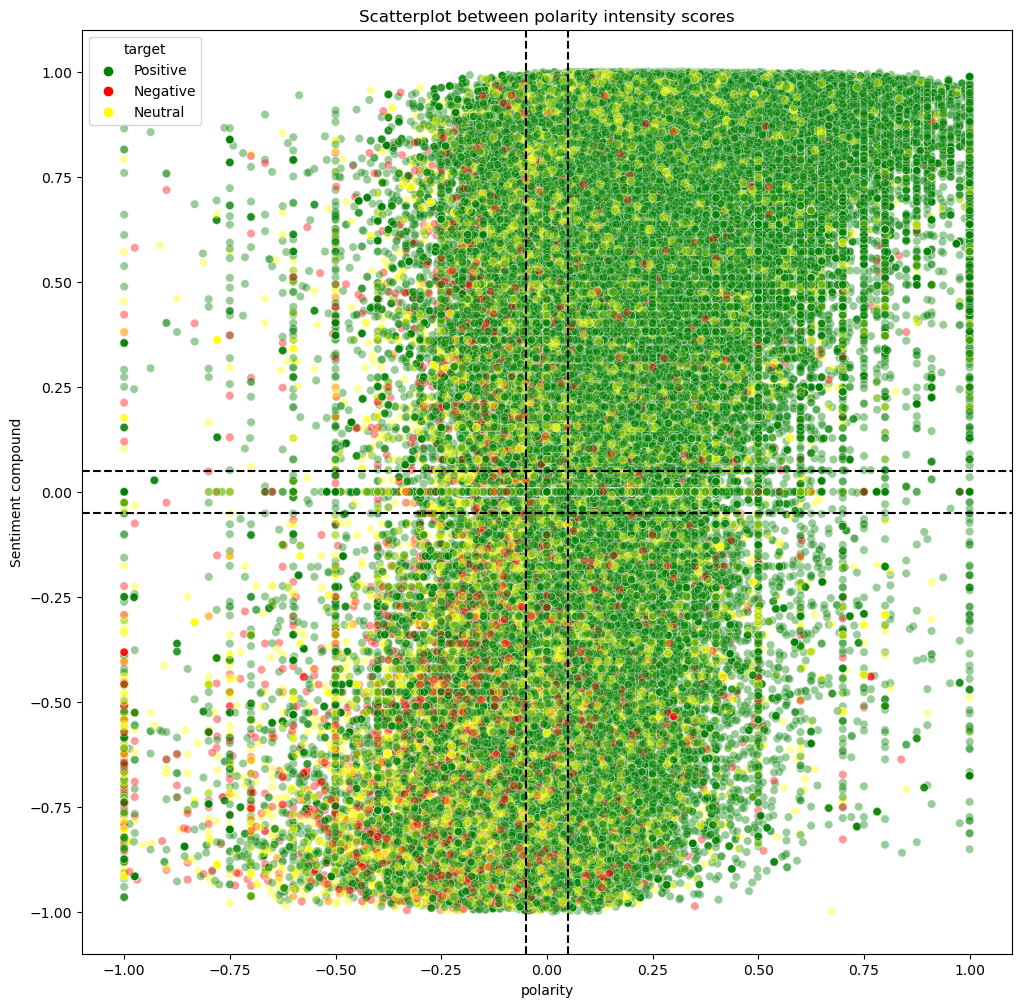

In [42]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='polarity', y='Sentiment compound',
                hue='target', palette=['green','red','yellow'], 
                alpha=.4)
plt.axhline(-0.05, linestyle='--', color='k')
plt.axhline(0.05,linestyle='--',color='k')
plt.axvline(-0.05, linestyle='--', color='k')
plt.axvline(0.05, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores');


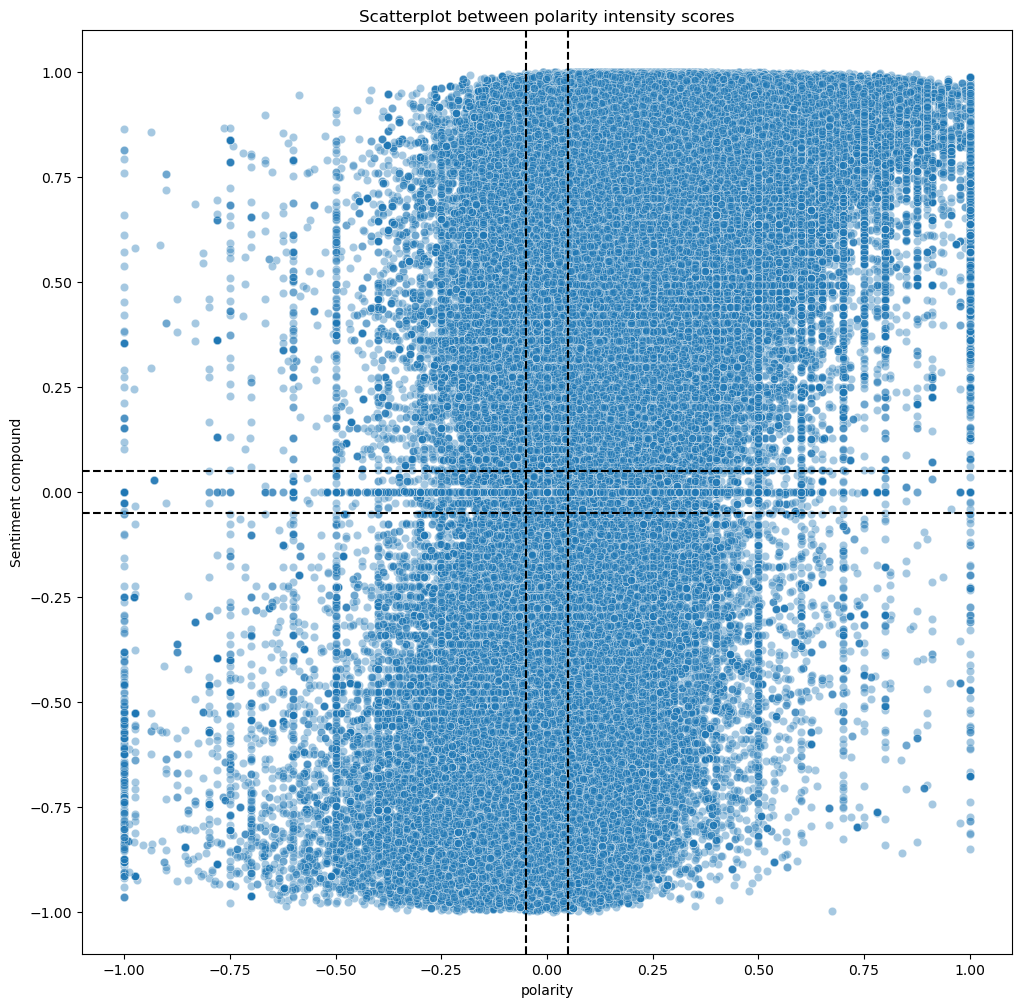

In [43]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='polarity', y='Sentiment compound',palette=['green','red','yellow'], alpha=.4)
plt.axhline(-0.05, linestyle='--', color='k')
plt.axhline(0.05,linestyle='--',color='k')
plt.axvline(-0.05, linestyle='--', color='k')
plt.axvline(0.05, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores');


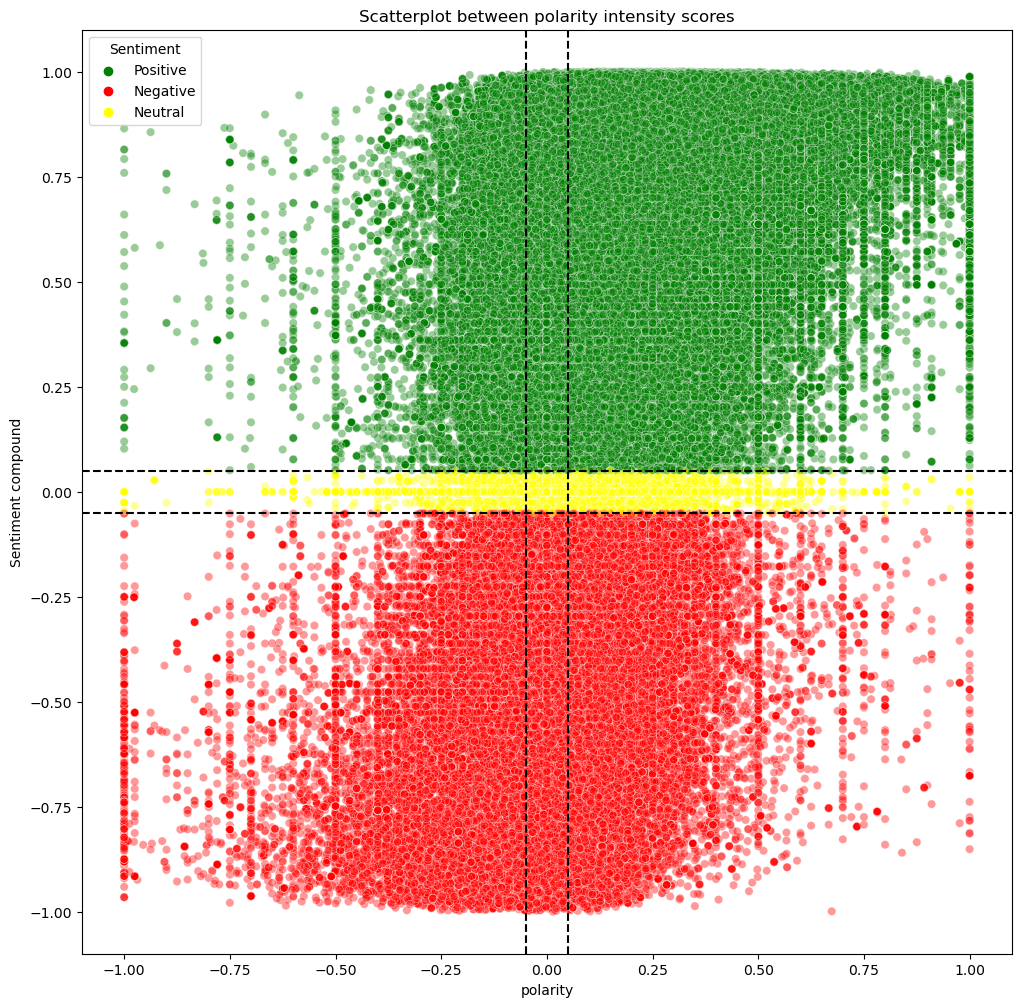

In [44]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='polarity', y='Sentiment compound',
                hue='Sentiment', palette=['green','red','yellow'], 
                alpha=.4)
plt.axhline(-0.05, linestyle='--', color='k')
plt.axhline(0.05,linestyle='--',color='k')
plt.axvline(-0.05, linestyle='--', color='k')
plt.axvline(0.05, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores');


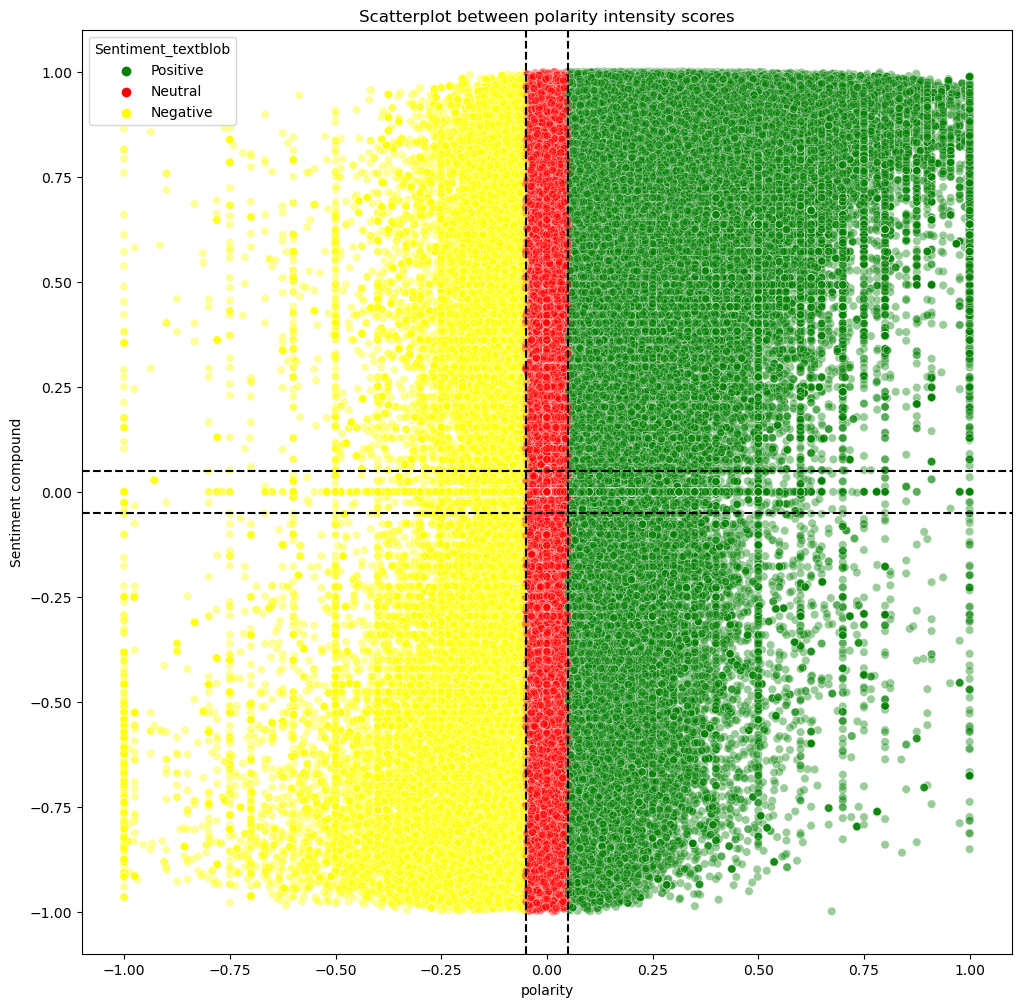

In [45]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x='polarity', y='Sentiment compound',
                hue='Sentiment_textblob', palette=['green','red','yellow'], 
                alpha=.4)
plt.axhline(-0.05, linestyle='--', color='k')
plt.axhline(0.05,linestyle='--',color='k')
plt.axvline(-0.05, linestyle='--', color='k')
plt.axvline(0.05, linestyle='--', color='k')
plt.title('Scatterplot between polarity intensity scores');


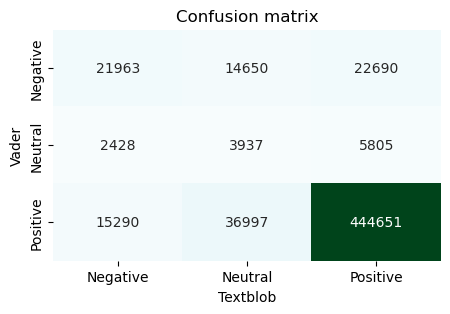

In [46]:
def plot_cm(y_test, y_pred,figsize=(5,3)):
    target_names=['Negative','Neutral','Positive']
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Textblob')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Vader')
    ax.set_yticklabels(target_names,fontdict={'verticalalignment': 'center'});
plot_cm(data['Sentiment'],data['Sentiment_textblob'])

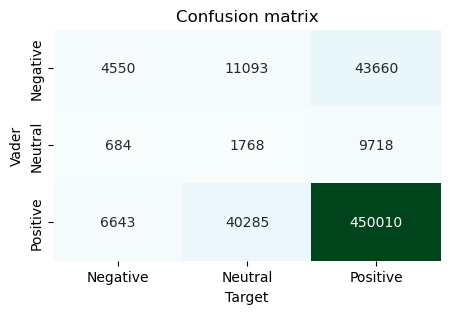

In [47]:
def plot_cm(y_test, y_pred,figsize=(5,3)):
    target_names=['Negative','Neutral','Positive']
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Target')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Vader')
    ax.set_yticklabels(target_names,fontdict={'verticalalignment': 'center'});
plot_cm(data['Sentiment'],data['target'])

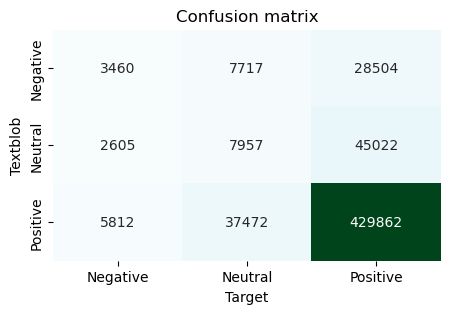

In [48]:
def plot_cm(y_test, y_pred,figsize=(5,3)):
    target_names=['Negative','Neutral','Positive']
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='g', cmap='BuGn', cbar=False, 
                ax=ax)
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Target')
    ax.set_xticklabels(target_names)
    ax.set_ylabel('Textblob')
    ax.set_yticklabels(target_names,fontdict={'verticalalignment': 'center'});
plot_cm(data['Sentiment_textblob'],data['target'])

# Pre processing text

In [49]:
review=data.copy(deep=True)
review.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Average rating  Sentiment compound  Sentiment compound summary Sentiment  \
0            5.00              0.9441                      0.4404  Positive   
1            1.00             -0.5664                      0.0000  Negative   
2            4.00              0.8265                      0.0000  Positive   
3            2.00              0.0000                      0.0000   Neutral   
4            4.75              0.9468                      0.6249  Positive   

   polarity  subjectivity Sentiment_textblob    target  
0  0.450000      0.433333           Positive  Positive  
1 -0.033333      0.762963            Neutral  Negative  
2  0.133571      0.448571           Positive  Positive  
3  0.166667      0.533333           Positive  Negative  
4  0.483333      0.637500           Positive  Positive

**Lower casing the text**

In [50]:
review['Text']=review['Text'].str.lower()

**cleaning text**

In [51]:
def cleanDoc(sent):
    doc = nlp(sent)
    lemmaOut = [token.lemma_ for token in doc]
    lemmaOut = " ".join(lemmaOut)
    return lemmaOut

In [52]:
# Cleansing using spacy's lemmatizer
cleansedList = []
for sentence in tqdm(list(review["Text"])):
     cleansedList.append(cleanDoc(sentence))

100%|████████████████████████████████| 568411/568411 [4:04:19<00:00, 38.77it/s]


In [53]:
review["text_clean"] = cleansedList

In [54]:
review.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price.  there was a wid...   

   Average rating  Sentiment compound  Sentiment compound summary Sentiment  \
0            5.00              0.9441                      0.4404  Positive   
1            1.00             -0.5664                      0.0000  Negative   
2            4.00              0.8265                      0.0000  Positive   
3            2.00              0.0000                      0.0000   Neutral   
4            4.75              0.9468                      0.6249  Positive   

   polarity  subjectivity Sentiment_textblob    target  \
0  0.450000      0.433333           Positive  Positive   
1 -0.033333      0.762963            Neutral  Negative   
2  0.133571      0.448571           Positive  Positive   
3  0.166667      0.533333           Positive  Negative   
4  0.483333      0.637500           Positive  Positive   

                                          text_clean  
0  I have buy several of the vitality can dog foo...  
1  product arrive label as jumbo salt peanut ... ...  
2  this be a confection that have be around a few...  
3  if you be look for the secret ingredient in ro...  
4  great taffy at a great price .   there be a wi...

In [ ]:
#stop=stopwords.words('english')
#review['text_clean']=review['text_clean'].apply(lambda x:[item for item in x if item not in stop])

In [9]:
vectorizer=TfidfVectorizer(max_df=0.9)
text=vectorizer.fit_transform(review['text_clean'])

In [8]:
text

<568411x108068 sparse matrix of type '<class 'numpy.float64'>'
	with 28495903 stored elements in Compressed Sparse Row format>

In [58]:
review.dtypes

Id                              int64
ProductId                      object
UserId                         object
ProfileName                    object
HelpfulnessNumerator             int8
HelpfulnessDenominator           int8
Score                            int8
Time                            int64
Summary                        object
Text                           object
Average rating                float64
Sentiment compound            float64
Sentiment compound summary    float64
Sentiment                      object
polarity                      float64
subjectivity                  float64
Sentiment_textblob             object
target                         object
text_clean                     object
dtype: object

In [59]:
#sparse.hstack((text,np.array(review['Average rating'])[:,None])).A

In [60]:
senti={'Positive':1,'Negative':-1,'Neutral':0}
review['Sentiment_number']=review['Sentiment'].map(senti)

In [61]:
print('Negative, Neutral, Positive records')
len(review[review['Sentiment_number']==-1]),len(review[review['Sentiment_number']==0]),len(review[review['Sentiment_number']==1])

Negative, Neutral, Positive records


(59303, 12170, 496938)

In [62]:
review=review[['ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Average rating','text_clean','Sentiment_number']]

In [63]:
review['HelpfulnessNumerator']=review['HelpfulnessNumerator'].astype('int8')
review['HelpfulnessDenominator']=review['HelpfulnessDenominator'].astype('int8')
review['Score']=review['Score'].astype('int8')
review['Sentiment_number']=review['Sentiment_number'].astype('int8')
review['Average rating']=review['Average rating'].astype('float16')

In [64]:
review.to_csv('review.csv')
data.to_csv('data.csv')

**We can try undersampling the records or may be oversampling or work with original records.**

- **Model building**

In [5]:
review=pd.read_csv('review.csv')
data=pd.read_csv('data.csv')

In [6]:
review.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
review.head()

ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score  Average rating  \
0                       1      5            5.00   
1                       0      1            1.00   
2                       1      4            4.00   
3                       3      2            2.00   
4                       0      5            4.75   

                                          text_clean  Sentiment_number  
0  I have buy several of the vitality can dog foo...                 1  
1  product arrive label as jumbo salt peanut ... ...                -1  
2  this be a confection that have be around a few...                 1  
3  if you be look for the secret ingredient in ro...                 0  
4  great taffy at a great price .   there be a wi...                 1

In [8]:
data.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Average rating  Sentiment compound  Sentiment compound summary Sentiment  \
0            5.00              0.9441                      0.4404  Positive   
1            1.00             -0.5664                      0.0000  Negative   
2            4.00              0.8265                      0.0000  Positive   
3            2.00              0.0000                      0.0000   Neutral   
4            4.75              0.9468                      0.6249  Positive   

   polarity  subjectivity Sentiment_textblob    target  
0  0.450000      0.433333           Positive  Positive  
1 -0.033333      0.762963            Neutral  Negative  
2  0.133571      0.448571           Positive  Positive  
3  0.166667      0.533333           Positive  Negative  
4  0.483333      0.637500           Positive  Positive

EDA

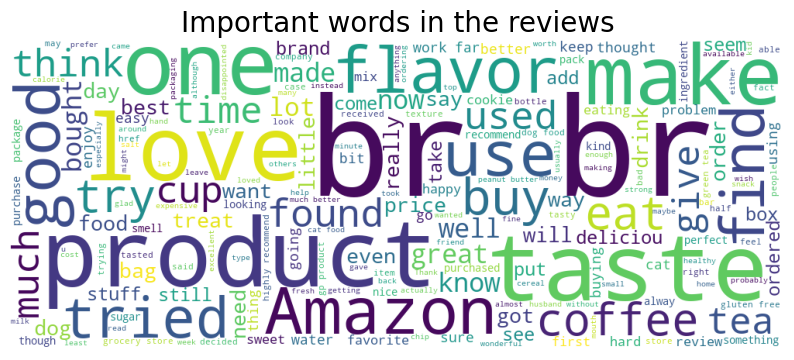

In [21]:
from wordcloud import WordCloud
rt=data['Text']
wordclouds=WordCloud(background_color='white',width=1000,height=400).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordclouds)
plt.title('Important words in the reviews',size=20)
plt.axis('off')
plt.show()

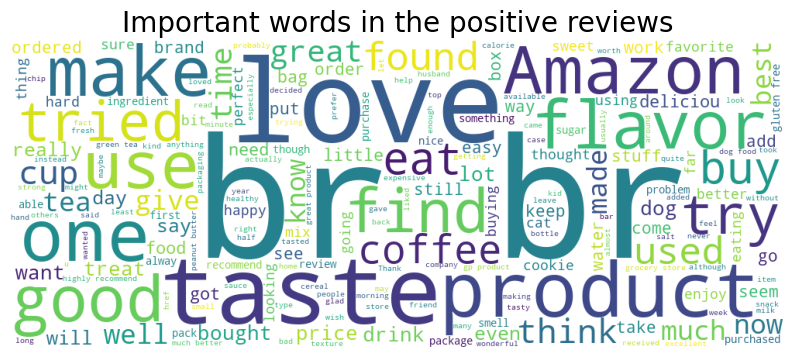

In [22]:
rt_pos=data[data['Sentiment']=='Positive']['Text']
wordclouds=WordCloud(background_color='white',width=1000,height=400).generate(" ".join(rt_pos))
plt.figure(figsize=(10,5))
plt.imshow(wordclouds)
plt.title('Important words in the positive reviews',size=20)
plt.axis('off')
plt.show()

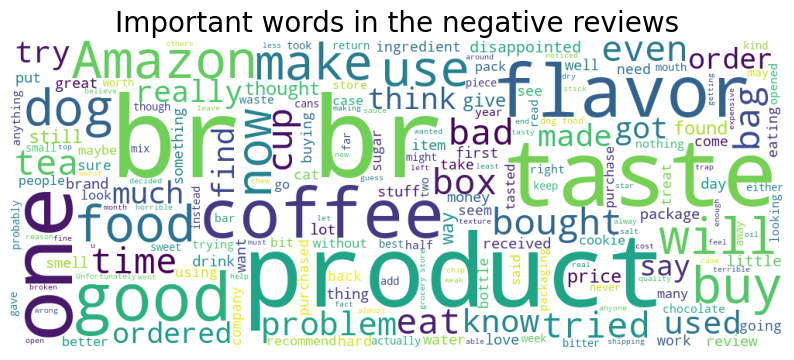

In [23]:
rt_neg=data[data['Sentiment']=='Negative']['Text']
wordclouds=WordCloud(background_color='white',width=1000,height=400).generate(" ".join(rt_neg))
plt.figure(figsize=(10,5))
plt.imshow(wordclouds)
plt.title('Important words in the negative reviews',size=20)
plt.axis('off')
plt.show()

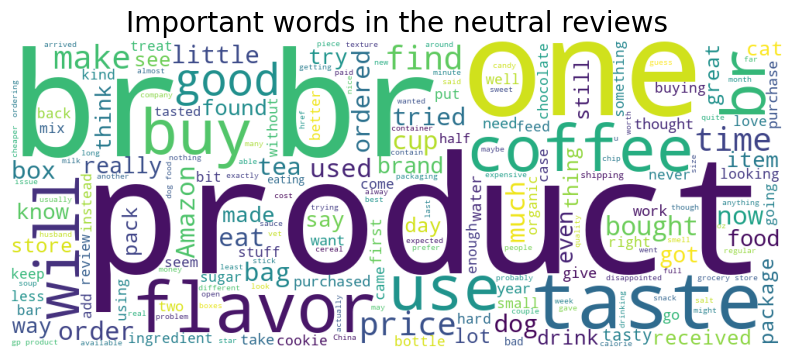

In [24]:
rt_neu=data[data['Sentiment']=='Neutral']['Text']
wordclouds=WordCloud(background_color='white',width=1000,height=400).generate(" ".join(rt_neu))
plt.figure(figsize=(10,5))
plt.imshow(wordclouds)
plt.title('Important words in the neutral reviews',size=20)
plt.axis('off')
plt.show()

Most of the words used in the reviews dont connect with the sentiment. Hence lets count the words which can describe sentiment in a better way

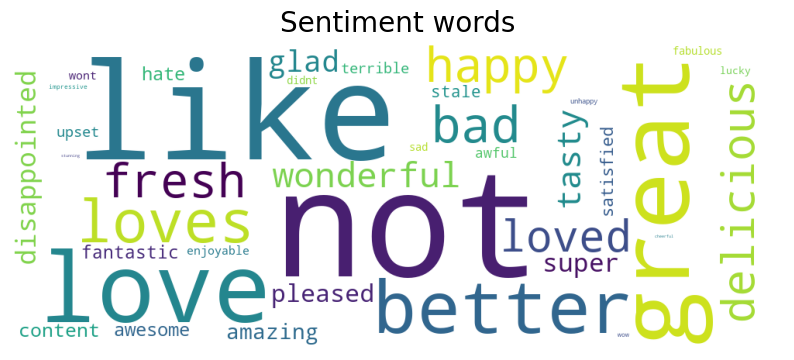

In [26]:
words=['awesome','great','stunning','fantastic','amazing','super','magnificient','wonderful','stunning','impressive',
       'fabulous','love','content','pleased','happy','satisfied','glad','cheerful','lucky','loves','loved','wow','enjoyable',
      'bad','terrible','upset','sad','unhappy','awful','disappointed','hate','delicious','tasty','fresh','wont','not','didnt',
       'better','like','stale']
rt=' '.join(data['Text'])
diz={}
for word in rt.split(' '):
    if word in words:
        diz[word]=diz.get(word,0)+1
wordclouds=WordCloud(background_color='white',width=1000,height=400).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordclouds)
plt.title('Sentiment words',size=20)
plt.axis('off')
plt.show()

    

In [29]:
data[data['Sentiment']=='Positive']['HelpfulnessNumerator'].value_counts()

0      269229
1      101306
2       46309
3       24786
4       14261
        ...  
159         1
162         1
354         1
580         1
247         1
Name: HelpfulnessNumerator, Length: 207, dtype: int64

Most of the positive reviews can be tagged as not helpful as the helpfulness numerator is 0

In [30]:
data[data['Sentiment']=='Negative']['HelpfulnessNumerator'].value_counts()

0      28142
1      12671
2       6261
3       3570
4       2258
       ...  
81         1
82         1
146        1
86         1
319        1
Name: HelpfulnessNumerator, Length: 123, dtype: int64

Most of the negative reviews can be tagged as not helpful as the helpfulness numerator is 0

In [10]:
def model_eval(model,x_train,x_test,y_train,y_test):
    print('---------',model,'---------')
    logreg=model
    logreg.fit(x_train,y_train)
    y_pred=logreg.predict(x_test)
    y_pred_train=logreg.predict(x_train)
    print('\nTRAINING SCORE:')
    print('\nAccuracy score: ',accuracy_score(y_train,y_pred_train))
    print('\nClassification report:\n',classification_report(y_train,y_pred_train))
    print('\nTESTING SCORE: ')
    print('\nAccuracy score: ',accuracy_score(y_test,y_pred))
    print('\nClassification report:\n',classification_report(y_test,y_pred))

- **Original data**

In [22]:
sent={-1:0,0:1,1:2}
review['Sentiment_number']=review['Sentiment_number'].map(sent)

In [23]:
x_or=text
y_or=review['Sentiment_number']

In [33]:
nm = NearMiss()
x_or_res,y_or_res=nm.fit_resample(x_or,y_or)

In [34]:
x_train_or,x_test_or,y_train_or,y_test_or=train_test_split(x_or_res,y_or_res,test_size=0.2,random_state=0)

1. Logistic regression

In [11]:
log_reg=LogisticRegression()
model_eval(log_reg,x_train_or,x_test_or,y_train_or,y_test_or)

--------- LogisticRegression() ---------

TRAINING SCORE:

Accuracy score:  0.9275632905825021

Classification report:
               precision    recall  f1-score   support

          -1       0.79      0.59      0.67     47411
           0       0.92      0.24      0.39      9734
           1       0.94      0.98      0.96    397583

    accuracy                           0.93    454728
   macro avg       0.89      0.61      0.67    454728
weighted avg       0.92      0.93      0.92    454728


TESTING SCORE: 

Accuracy score:  0.921052400095001

Classification report:
               precision    recall  f1-score   support

          -1       0.76      0.56      0.65     11892
           0       0.84      0.18      0.30      2436
           1       0.93      0.98      0.96     99355

    accuracy                           0.92    113683
   macro avg       0.84      0.57      0.63    113683
weighted avg       0.91      0.92      0.91    113683



We see that in the testing scores:

    - Negative class has good precision but low recall indicating that the model has poor ability to detect a negative class point but at the same time when it does its trustable to an extent.
    - Neutral class has good precision but very less recall and this suggests that the model is very weak in identifying a neutral class but at the same time when it does, its trustable to an extent.
    - Positive class has a good precision and recall suggesting that the model has fit well over the data.
    
This may be due to imbalanced dataset as well. lets try it out by undersampling

In [35]:
log_reg=LogisticRegression()
model_eval(log_reg,x_train_or,x_test_or,y_train_or,y_test_or)

--------- LogisticRegression() ---------

TRAINING SCORE:

Accuracy score:  0.854354971240756

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      9787
           1       0.83      0.82      0.83      9690
           2       0.89      0.91      0.90      9731

    accuracy                           0.85     29208
   macro avg       0.85      0.85      0.85     29208
weighted avg       0.85      0.85      0.85     29208


TESTING SCORE: 

Accuracy score:  0.7937551355792933

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      2383
           1       0.76      0.75      0.76      2480
           2       0.85      0.88      0.87      2439

    accuracy                           0.79      7302
   macro avg       0.79      0.79      0.79      7302
weighted avg       0.79      0.79      0.79      7302



2. Random forest classifier

In [38]:
n_estimators=[int(a) for a in np.linspace(100,1000,10)]
max_features=['auto','sqrt','log2']
max_depth=[int(b) for b in np.linspace(10,1000,10)]
d=['entropy','gini']
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
thunder={'n_estimators':n_estimators,
         'max_features':max_features,
         'min_samples_split':min_samples_split,
         'max_depth':max_depth,
         'min_samples_leaf':min_samples_leaf,
         'criterion':d}

In [40]:
rf_dum=RandomForestClassifier()
rf_dum_rsc=RandomizedSearchCV(estimator=rf_dum,
                              param_distributions=thunder,
                              n_iter=100,cv=3,verbose=10,random_state=100,n_jobs=-1)
rf_dum_rsc.fit(x_train_or,y_train_or)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [44]:
rfc=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=30,criterion='entropy',min_samples_split=10)
model_eval(rfc,x_train_or,x_test_or,y_train_or,y_test_or)

--------- RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=10,
                       n_estimators=200) ---------

TRAINING SCORE:

Accuracy score:  0.8709257737606135

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87      9787
           1       0.75      0.95      0.84      9690
           2       0.98      0.85      0.91      9731

    accuracy                           0.87     29208
   macro avg       0.89      0.87      0.87     29208
weighted avg       0.89      0.87      0.87     29208


TESTING SCORE: 

Accuracy score:  0.7647219939742537

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      2383
           1       0.68      0.84      0.75      2480
           2       0.86      0.78      0.82      2439

    accuracy                           0.76      7302
   macro avg       0.78      0.76      0.77     

In [45]:
rfc=RandomForestClassifier(n_estimators=250,max_features='auto',max_depth=100,criterion='entropy',min_samples_split=15)
model_eval(rfc,x_train_or,x_test_or,y_train_or,y_test_or)

--------- RandomForestClassifier(criterion='entropy', max_depth=100, max_features='auto',
                       min_samples_split=15, n_estimators=250) ---------

TRAINING SCORE:

Accuracy score:  0.9887017255546425

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9787
           1       0.97      1.00      0.98      9690
           2       1.00      0.99      0.99      9731

    accuracy                           0.99     29208
   macro avg       0.99      0.99      0.99     29208
weighted avg       0.99      0.99      0.99     29208


TESTING SCORE: 

Accuracy score:  0.8155299917830732

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78      2383
           1       0.77      0.84      0.80      2480
           2       0.87      0.86      0.87      2439

    accuracy                           0.82      7302
   macro avg       0.82   

In [36]:
xg=XGBClassifier(n_estimators=100)

In [37]:
model_eval(xg,x_train_or,x_test_or,y_train_or,y_test_or)

--------- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) ---------

TRAINING SCORE:

Accuracy score:  0.9067036428375788

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      9787
           1       0.87      0.91      0.89      96